**Advance programming and Master data science**

Assignment 11:**DataPreProcessing**

Name: Santhosh R

Batch:D18

Dept:Data Science

# Glass Identification Data Set

**Abstract**: From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)

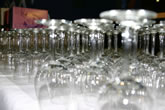

**Data Set Information**:

Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were obtained (# incorrect answers):

Type of Sample -- Beagle -- NN -- DA
Windows that were float processed (87) -- 10 -- 12 -- 21
Windows that were not: (76) -- 19 -- 16 -- 22

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
%autosave 60

Autosaving every 60 seconds


**Step 2: Importing dataset**

In [ ]:
data=pd.read_csv('/content/Data.csv')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9.0,38.777778,7.693793,27.0,35.0,38.0,44.0,50.0
Salary,9.0,63777.777778,12265.579662,48000.0,54000.0,61000.0,72000.0,83000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


**Step 3: Handling the missing data**

In [ ]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
data["Salary"].fillna(data["Salary"].median(),inplace=True)

In [ ]:
data["Age"].fillna(data["Age"].median(),inplace=True)

In [ ]:
data.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [ ]:
from sklearn import preprocessing
data["Purchased"]=data[["Purchased"]].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,38.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


**Step 5: Creating a dummy variable**

In [ ]:
onehotencode=pd.get_dummies(data)
onehotencode

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,61000.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,38.0,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


In [ ]:
X=onehotencode.drop(columns=["Salary"])
X

,Age,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,0,1,0,0
1,27.0,1,0,0,1
2,30.0,0,0,1,0
3,38.0,0,0,0,1
4,40.0,1,0,1,0
5,35.0,1,1,0,0
6,38.0,0,0,0,1
7,48.0,1,1,0,0
8,50.0,0,0,1,0
9,37.0,1,1,0,0


In [ ]:
Y=onehotencode["Salary"]
Y

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4    61000.0
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
# Input Data
# X = features

# Output Data
# Y = Target feature

# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 5)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)



xtrain shape :  (8, 5)
xtest shape :  (2, 5)
ytrain shape :  (8,)
ytest shape :  (2,)


**Step 7: Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scalar=scaler.fit_transform(X_train)
Y_train_Scalar=scaler.transform(X_test)